In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')
# fetch_openml('mnist_784', cache=False)


In [3]:
X = mnist['data']
y = mnist['target']

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1)



In [11]:
%time cross_val_score(clf, X, y, cv = 3).mean()

CPU times: user 2.7 s, sys: 1.59 s, total: 4.29 s
Wall time: 11.5 s


0.923328557315846

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

fold = KFold(n_splits=3, shuffle=True, random_state=42)

params = {'max_depth': np.arange(5, 25, 5), 'n_estimators': np.arange(10, 150, 50)}
gcv = GridSearchCV(RandomForestClassifier(n_jobs=1), params, n_jobs=8, verbose=1, cv = fold)

gcv.fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

Чтобы сохранить модель написанную на sklearn обычно используют **pickle.**

Pickle — встроенный в питон пакет для сериализации и десереализации данных. 

Сериализация - процесс когда питоновский объект(или в другом языке программирования) переход в байты/строку.


JSON это тоже пример серилазиации. 

JSON — (JS object) -> String и наоборот

In [21]:
fold = KFold(n_splits=3, shuffle=True, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)

%time cross_val_score(clf, X, y, cv = fold).mean()

CPU times: user 7.8 s, sys: 2.51 s, total: 10.3 s
Wall time: 49.8 s


0.966428586516694

In [26]:
import pickle

clf.fit(X, y)

with open('model_digits.pickle', 'wb') as f:
    pickle.dump(clf, f)


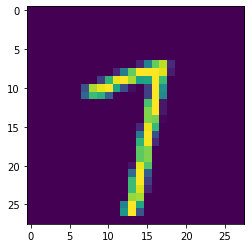

In [28]:
plt.imshow(X[42].reshape(28, 28))

In [36]:
pd.Series(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [37]:
!pip3 install imbalanced-learn
# https://imbalanced-learn.readthedocs.io/en/stable/install.html

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [39]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [40]:
pd.Series(y_resampled).value_counts()

7    7877
6    7877
4    7877
8    7877
5    7877
9    7877
1    7877
3    7877
2    7877
0    7877
dtype: int64

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)

clf.fit(X_resampled, y_resampled)

with open('model_digits.pickle', 'wb') as f:
    pickle.dump(clf, f)

